In [1]:
import pandas as pd
import numpy as np
from demo.visual_gt_pred import plotNImage, osp, Path




In [3]:
save_dir = Path('/mnt/data2/dejuns/stoic2021/processed')
info_fp = save_dir/f'stoic2021_case_info.csv'
info_tb = pd.read_csv(info_fp)
print(info_tb.describe())
print(info_tb.columns)


         PatientID    probCOVID  probSevere  SliceThickness
count   2000.00000  2000.000000  2000.00000     2000.000000
mean    5194.71900     0.602500     0.15050        1.092200
std     3122.47492     0.489503     0.35765        0.502086
min        6.00000     0.000000     0.00000        0.500000
25%     2437.75000     0.000000     0.00000        0.750000
50%     5111.00000     1.000000     0.00000        1.000000
75%     7904.50000     1.000000     0.00000        1.250000
max    10729.00000     1.000000     1.00000        5.000000
Index(['PatientID', 'probCOVID', 'probSevere', 'ITK_InputFilterName',
       'ITK_original_direction', 'ITK_original_spacing', 'PatientAge',
       'PatientName', 'PatientSex', 'SliceThickness', 'img_path', 'old_shape',
       'old_spacing', 'resize_shape', 'new_shape', 'new_spacing',
       'body_center'],
      dtype='object')


In [9]:
std_age = lambda x: int(x[1:-1]) if len(x) > 2 else int(x)
info_tb['PatientAge'] = info_tb['PatientAge'].apply(std_age)

probCOVID     0    1
PatientAge          
35          146   99
45           80  150
55          121  225
65          119  266
75          132  223
85          197  242


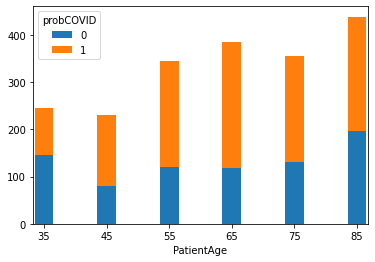

In [15]:
covid_by_age = pd.crosstab(info_tb['PatientAge'], info_tb['probCOVID'])
print(covid_by_age)
ax_age = covid_by_age.plot.bar(rot = 0, stacked = True, width=3)


probSevere    0   1
PatientAge         
35          236   9
45          205  25
55          309  37
65          317  68
75          281  74
85          351  88


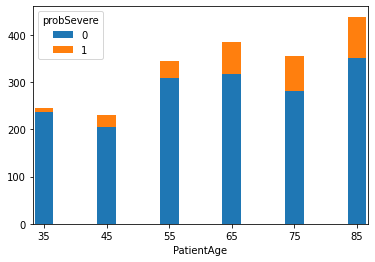

In [16]:

severe_by_age = pd.crosstab(info_tb['PatientAge'], info_tb['probSevere'])
print(severe_by_age)
ax_severe = severe_by_age.plot.bar(rot = 0, stacked = True, width=3)

probSevere    0    1
PatientSex          
A             1    0
F           701   91
M           858  192
O           106   13


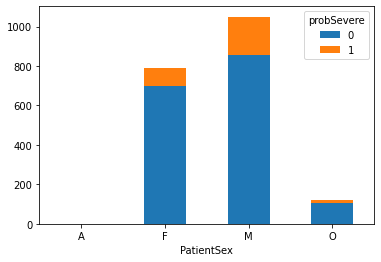

In [19]:

severe_by_sex = pd.crosstab(info_tb['PatientSex'], info_tb['probSevere'])
print(severe_by_sex)
ax_severe = severe_by_sex.plot.bar(rot = 0, stacked = True)

probCOVID     0    1
PatientSex          
A             1    0
F           330  462
M           372  678
O            77   42


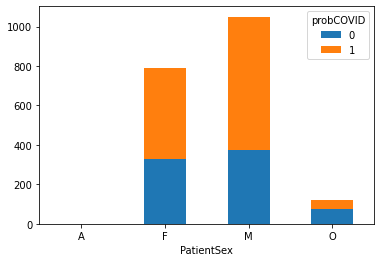

In [20]:
covid_by_sex = pd.crosstab(info_tb['PatientSex'], info_tb['probCOVID'])
print(covid_by_sex)
ax_severe = covid_by_sex.plot.bar(rot = 0, stacked = True)

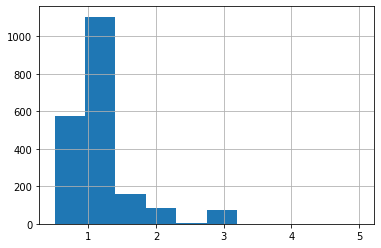

In [21]:
thick_ax = info_tb['SliceThickness'].hist()

/home/dejuns/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


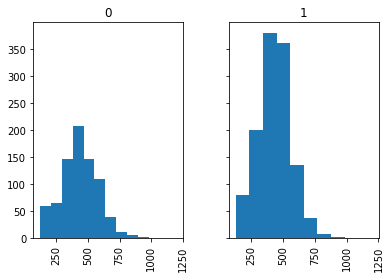

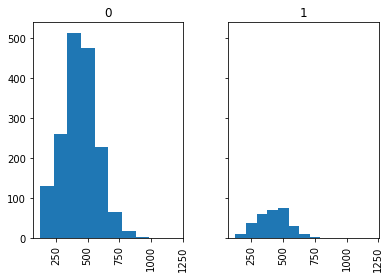

In [39]:
info_tb['old_shape_z'] = info_tb['old_shape'].apply(lambda x: int(x.split('_')[-1]))
ax_zsize = info_tb.hist('old_shape_z',  by = 'probCOVID', sharex = True, sharey = True)

ax_zsize_severe = info_tb.hist('old_shape_z',  by = 'probSevere', sharex = True, sharey = True)


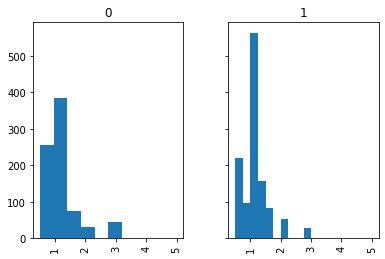

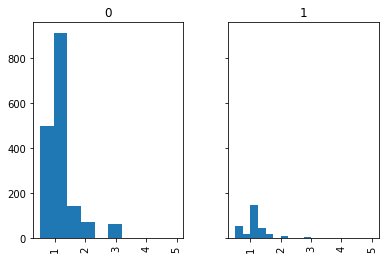

In [40]:
# info_tb.plot.scatter(x = 'SliceThickness', y = 'old_shape_z')
ax_zsize = info_tb.hist('SliceThickness',  by = 'probCOVID', sharex = True, sharey = True)

ax_zsize_severe = info_tb.hist('SliceThickness',  by = 'probSevere', sharex = True, sharey = True)

probCOVID         0    1
SliceThickness          
0.500             3    2
0.600            22   10
0.625           125  209
0.750           103   98
0.900             3    0
1.000           314  563
1.250            71  157
1.500            76   84
2.000            30   52
2.500             2    1
3.000            45   29
5.000             1    0


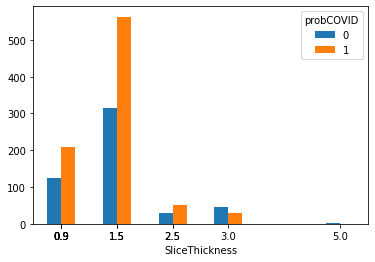

In [29]:
covid_by_thick = pd.crosstab(info_tb['SliceThickness'], info_tb['probCOVID'])
print(covid_by_thick)
ax_thick = covid_by_thick.plot.bar(rot = 0,)

probSevere        0    1
SliceThickness          
0.500             4    1
0.600            31    1
0.625           280   54
0.750           183   18
0.900             3    0
1.000           730  147
1.250           183   45
1.500           142   18
2.000            73    9
2.500             3    0
3.000            66    8
5.000             1    0


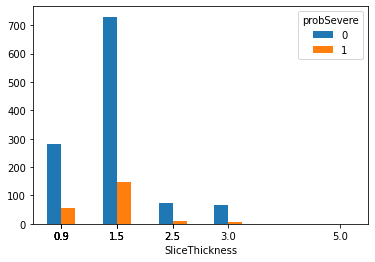

In [31]:
severe_by_thick = pd.crosstab(info_tb['SliceThickness'], info_tb['probSevere'])
print(severe_by_thick)
ax_thick = severe_by_thick.plot.bar(rot = 0,)

<AxesSubplot:xlabel='new_spacing_z', ylabel='new_shape_z'>

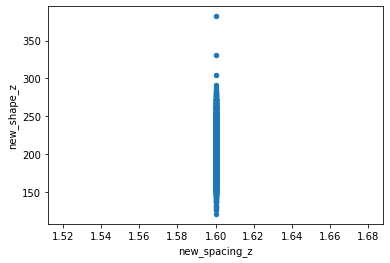

In [25]:
# 'new_shape', 'new_spacing',
info_tb['new_shape_z'] = info_tb['new_shape'].apply(lambda x: int(x.split('_')[-1]))
info_tb['new_spacing_z'] = info_tb['new_spacing'].apply(lambda x: float(x.split('_')[-1]))
info_tb.plot.scatter(x = 'new_spacing_z', y = 'new_shape_z')